## Determine max distance between sensors and each point on the planet
This distance map is used to computes the probability of detecting a given event across an entire sensor network

In [87]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import compute_network_shapes_CPUs as cns
import geopandas as gpd 
import pandas as pd

In [81]:
gdf_all = gpd.read_file(f"./data/airglow_shp/network_SNRnight10.0_SNRday1.shp")

IndexError: list index out of range

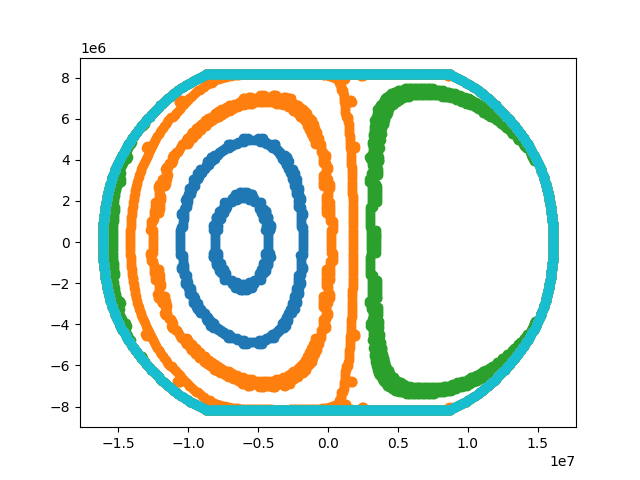

In [85]:
def get_colors_from_cmap(cmap_name, n_colors):
    cmap = plt.get_cmap(cmap_name)  # Get the colormap
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# Example usage
n = 20
colors = get_colors_from_cmap('tab10', n)

plt.figure()
for itest, test_loc in gdf_all.iterrows():

    if (itest > n)&(itest < 2*n):
        break

    geo = test_loc.geometry
    if geo.geom_type == 'Polygon': ## Tectonic settings
        coords = np.array(geo.exterior.coords[:])
        plt.scatter(coords[:,0], coords[:,1], color=colors[itest])
    else:
        for geo_loc in geo.geoms:
            coords = np.array(geo_loc.exterior.coords[:])
            plt.scatter(coords[:,0], coords[:,1], color=colors[itest])
    

In [86]:
gdf_all

,distance,iscenario,lat_statio,lon_statio,period,geometry
0,10.0,25,-0.0,-130.0,1.0,"MULTIPOLYGON (((-7659826.581 -1217797.047, -78..."
1,510.0,25,-0.0,-130.0,1.0,"MULTIPOLYGON (((-8468840.833 -3956778.369, -83..."
2,1010.0,25,-0.0,-130.0,1.0,"MULTIPOLYGON (((-5728434.759 -6987425.369, -57..."
3,1510.0,25,-0.0,-130.0,1.0,"MULTIPOLYGON (((-8339818.744 -7936001.352, -84..."
4,2010.0,25,-0.0,-130.0,1.0,"MULTIPOLYGON (((-15330762.341 -3349016.908, -1..."
...,...,...,...,...,...,...
17665,16510.0,179,0.0,178.0,100.0,"POLYGON ((-15538589.107 -2942992.337, -1558345..."
17666,17010.0,179,0.0,178.0,100.0,"POLYGON ((-15538589.107 -2942992.337, -1558345..."
17667,17510.0,179,0.0,178.0,100.0,"POLYGON ((-15538589.107 -2942992.337, -1558345..."
17668,18010.0,179,0.0,178.0,100.0,"POLYGON ((-15538589.107 -2942992.337, -1558345..."


### Grid source locations

In [47]:
reload(cns)

dlon = 2.
lats, lons = np.arange(-90, 89, dlon/2.), np.arange(-180, 179, dlon)
LATS, LONS, shape_init = cns.get_grid(lats, lons)

In [49]:
reload(cns)
polys = cns.get_polys(LONS, LATS, dlon, R0=6052000)

### Create pressure-to-airglow scaling functions

100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
c:\Users\quentin\Documents\2024_Venus_Detectability\compute_network_shapes_CPUs.py:272: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


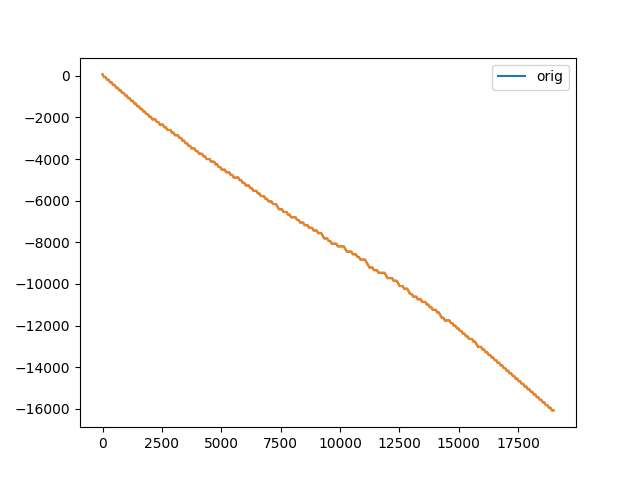

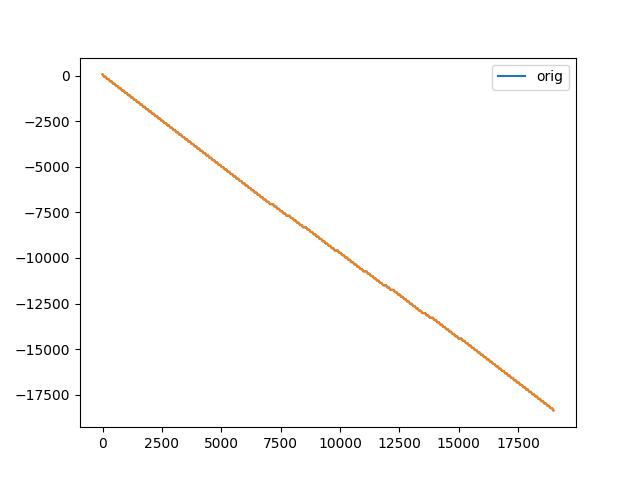

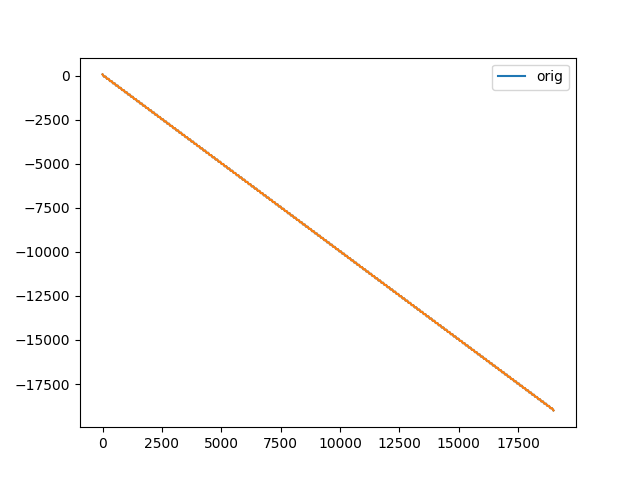

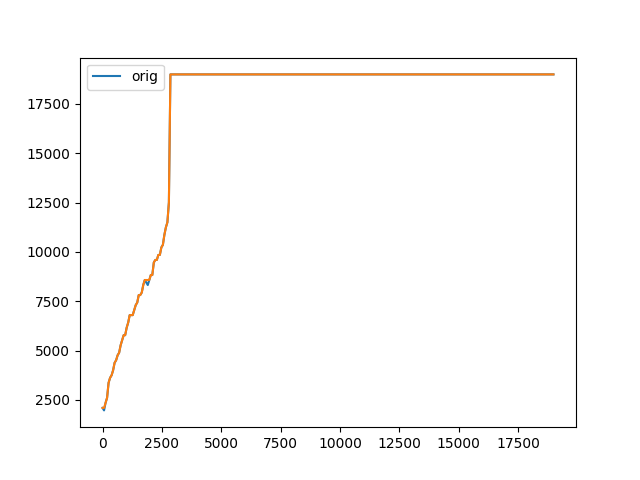

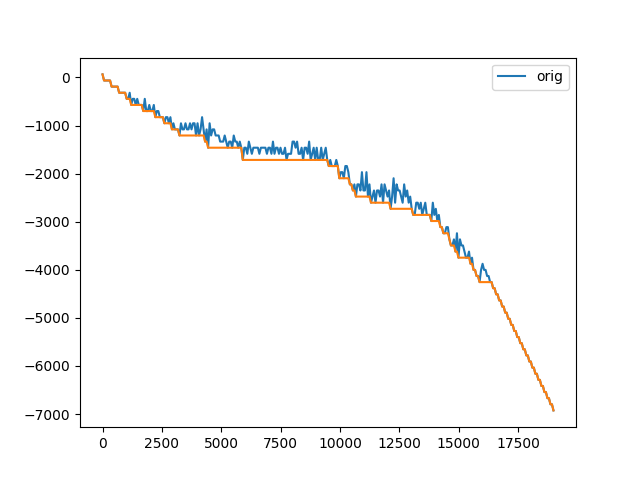

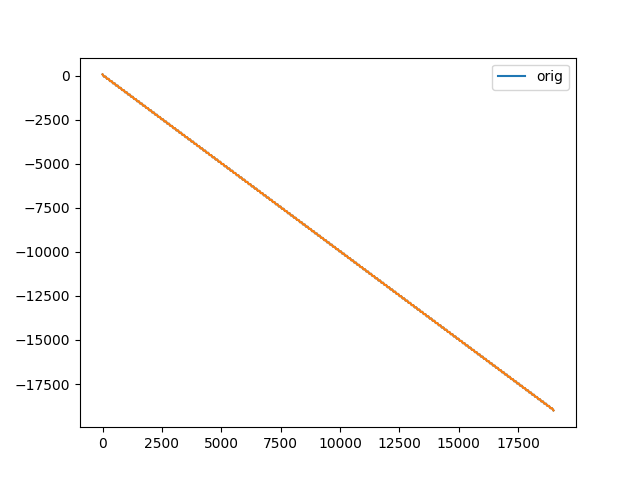

In [48]:
import compute_network_shapes_CPUs as cns
import proba_modules as pm
reload(cns)
reload(pm)

file_curve = './data/GF_data/GF_Dirac_1Hz_all_wfreq.csv'
dict_scaling = dict(R0=6052000, sigma_balloon=1e-2, boost_SNR=dict(dayglow=1, nightglow=10.), photons_dayglow=3.5e5, alpha_dayglow=1e-5, photons_nightglow=2e4, beta=1.,)
freq = [1e-2, 1e-1, 1.]
f_alt_scaling_dayglow, f_alt_scaling_nightglow, TL_new_v, TL_new_p = cns.get_airglow_scaling(file_curve, freq, **dict_scaling)

In [24]:
reload(cns)

file_curve = './data/GF_data/GF_Dirac_1Hz_all_wfreq.csv'
dict_scaling = dict(R0=6052000, sigma_balloon=1e-2, boost_SNR=dict(dayglow=1, nightglow=10.), photons_dayglow=3.5e5, alpha_dayglow=1e-5, photons_nightglow=2e4, beta=1., TL_new_v=TL_new_v, TL_new_p=TL_new_p,)
freq = [1e-2, 1e-1, 1.]
f_alt_scaling_dayglow, f_alt_scaling_nightglow, TL_new_v, TL_new_p = cns.get_airglow_scaling(file_curve, freq, **dict_scaling)

NameError: name 'TL_new_v' is not defined

### Create list of stations

In [89]:
reload(cns)

dlon_stations = 5.
lats, lons = np.arange(-90, 89, dlon_stations/2.), np.arange(-180, 179, dlon_stations)
offsets = [[20., 50.]]
dict_stations = dict(offsets=offsets, use_airglow=False, use_only_airglow=False, fixed_stations=dict(), add_velocity=True, vel_baloon=0.2, vel_imager=0.36)
#offsets = []
#dict_stations = dict(offsets=offsets, use_airglow=True, use_only_airglow=True, fixed_stations=dict(), add_velocity=True, vel_baloon=0.2, vel_imager=0.36)
lats_stations, lons_stations, id_scenario, id_stat = cns.get_stations(lats, lons, **dict_stations)
lats_stations.shape

(5184, 3)

### Find max distance between all sensors (will scale airglow based on provided TLs)

#### Balloons only

In [ ]:
opt_dist = dict(s_cluster=100, use_airglow=False)
max_dist = {1.: cns.get_max_dist(lats_stations, lons_stations, LATS, LONS, id_scenario, id_stat, **opt_dist)}

  0%|          | 0/52 [00:00<?, ?it/s]

c:\Users\quentin\Documents\2024_Venus_Detectability\compute_network_shapes_CPUs.py:155: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
  4%|▍         | 2/52 [00:04<01:55,  2.32s/it]

#### Airglow

In [73]:
reload(cns)

opt_dist = dict(s_cluster=100, use_airglow=dict_stations['use_airglow'], which_stat_is_airglow=0, lon_0_airglow=dict(nightglow=180., dayglow=0.), radius_airglow=dict(nightglow=60., dayglow=70.), radius_view=60., airglow_considered=['nightglow','dayglow'])
max_dist = dict()
for period, f_alt_scaling_nightglow_period in f_alt_scaling_nightglow.items():
    f_alt_scaling = dict(nightglow=f_alt_scaling_nightglow_period, dayglow=f_alt_scaling_dayglow[period])
    #f_alt_scaling = dict(nightglow=f_alt_scaling_nightglow_period, dayglow=f_alt_scaling_nightglow_period)
    max_dist_loc = cns.get_max_dist(lats_stations, lons_stations, LATS, LONS, id_scenario, id_stat, f_alt_scaling=f_alt_scaling, **opt_dist)
    max_dist[period] = max_dist_loc.copy()

100%|██████████| 2/2 [00:07<00:00,  3.60s/it]


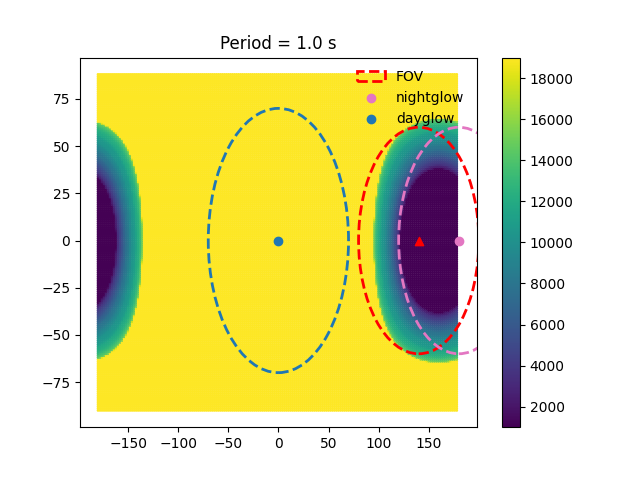

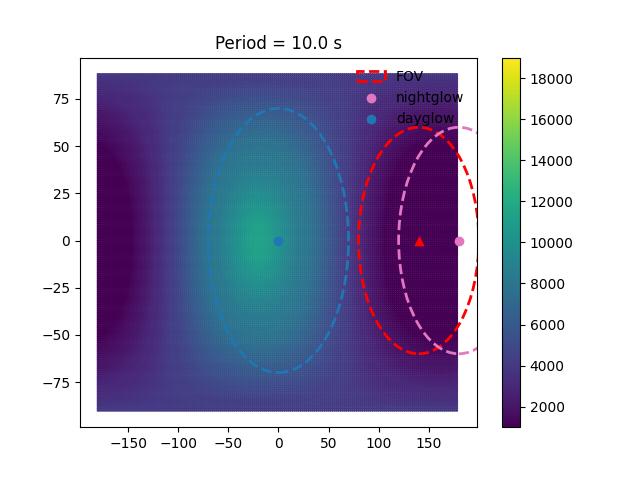

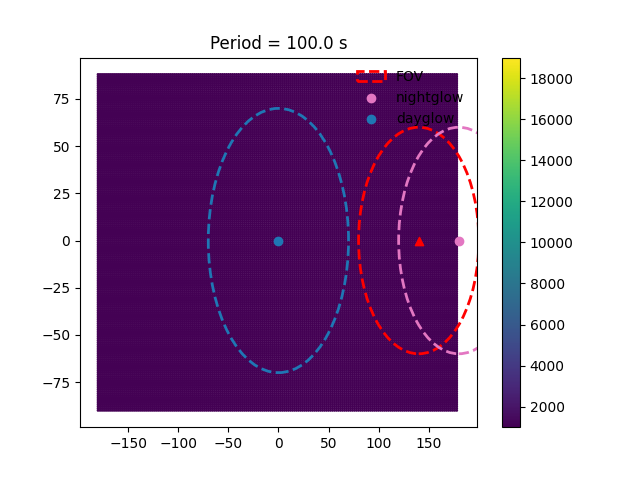

In [77]:
def plot_one_max_dist(id, period, max_dist_loc, use_airglow=False, vmin=1e3, vmax=19e3):

    plt.figure()
    sc = plt.scatter(LONS, LATS, c=max_dist_loc[id,:]/1e3, s=1, vmin=vmin, vmax=vmax)
    #max_dist_loc_threshold = max_dist_loc[id,:].copy()
    #max_dist_loc_threshold
    plt.colorbar(sc)
    plt.scatter(lons_stations[id,:], lats_stations[id,:], c='red', marker='^')

    if use_airglow:
        circle = plt.Circle((lons_stations[id,-1], lats_stations[id,-1]), opt_dist['radius_view'], edgecolor='red', ls='--', facecolor='none', linewidth=2, label='FOV')
        plt.gca().add_artist(circle)

        colors = dict(dayglow='tab:blue', nightglow='tab:pink')
        for airglow, lon0 in opt_dist['lon_0_airglow'].items():
            radius = opt_dist['radius_airglow'][airglow]
            plt.scatter(lon0, 0., marker='o', label=airglow, color=colors[airglow])
            circle = plt.Circle((lon0, 0.), radius, edgecolor=colors[airglow], ls='--', facecolor='none', linewidth=2,)
            plt.gca().add_artist(circle)

    plt.title(f'Period = {period} s')
    plt.legend(frameon=False)

id = 160
for period, max_dist_loc in max_dist.items():
    plot_one_max_dist(id, period, max_dist_loc, use_airglow=opt_dist['use_airglow'])

### Save numpy matrix of max distances

In [67]:
str_offsets = '-'.join(['_'.join(np.array(l_offsets).astype(str)) for l_offsets in dict_stations['offsets']])

#max_dist = np.load('./max_dist.npy', mmap_mode='r')
for period, max_dist_loc in max_dist.items():
    file = f'./data/max_dist/max_dist_{str_offsets}_{period:.0f}s.npy'
    with open(file, 'wb') as f:
        np.save(f, max_dist_loc)

### Create shape file for surface ratio computation

In [78]:
reload(cns)

plot = False
R0 = 6052000
thresholds = np.arange(10000, np.pi*R0/1.001, 5e5)[:]/1e3
gdf_all = pd.DataFrame()
for period, max_dist_loc in max_dist.items():
    print(f'Period {period}')
    gdf_loc = cns.compute_surfaces_CPUs(thresholds, LATS, LONS, lats_stations, lons_stations, polys, plot, R0, max_dist_loc, nb_CPU=1)
    gdf_loc['period'] = period
    gdf_all = pd.concat([gdf_all, gdf_loc])
gdf_all.reset_index(drop=True, inplace=True)

Period 1.0
Running serial


100%|██████████| 180/180 [10:28<00:00,  3.49s/it]


Period 10.0
Running serial


100%|██████████| 180/180 [13:28<00:00,  4.49s/it]


Period 100.0
Running serial


100%|██████████| 180/180 [11:54<00:00,  3.97s/it]


In [79]:
file = f"./data/airglow_shp/network_SNRnight{dict_scaling['boost_SNR']['nightglow']}_SNRday{dict_scaling['boost_SNR']['dayglow']}.shp"
gdf_all.to_file(file)

C:\Users\quentin\AppData\Local\Temp\ipykernel_21600\3504460055.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_all.to_file(file)
